#Logistic regression(heart diseases prediction)
Elias David Solís López-T00056466

Maria Fernanda Campo Romero - T00049516

inteligencia artificial 


universidad tecnologica de bolivar
23/04/2023






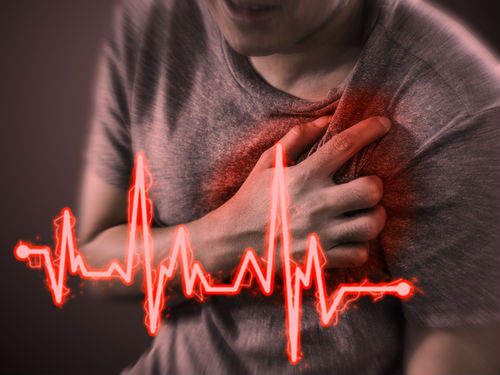

#Introduction


---


"Heart disease" is a broad term used to describe diseases and conditions affecting the heart and circulatory system. They are also known as heart disease.




There are many types and kinds of heart disease. They often result in narrowing or blockage of the coronary arteries, heart valve problems, enlargement of the heart, etc., leading to heart failure and myocardial infarction. 

In [ ]:
#library import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import missingno as msno
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
%matplotlib inline
import seaborn as sns
import os

import matplotlib as mpl
# Data splitting/parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Feature processing
from sklearn.feature_selection import SelectPercentile, chi2

# Evaluation metrics
from sklearn.metrics import confusion_matrix


In [ ]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving cleveland.csv to cleveland (1).csv


In [ ]:
#read an check dataset information
import io
data = pd.read_csv('cleveland.csv', on_bad_lines='skip')
data.head(6)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


**##Atributte information:**



---



**age**: *the length of time that a person has lived or a thing has existed.*

**sex**: *sex (1 = male; 0 = female)*

**cp**: *chest pain type*
1.   Value 1: typical angina
2.   Value 2: atypical angina
3.   Value 3: non-anginal pain
4.   Value 4: asymptomatic


**trestbps**: *resting blood pressure (in mm Hg on admission to the hospital)*

**chol**: *serum cholestoral in mg/dl*

**fbs**: *(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)*

**restecg**: *resting electrocardiographic results*
1.  Value 0: normal
2.  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3.   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


**thalach**: *maximum heart rate achieved*

**exang**: *exercise induced angina (1 = yes; 0 = no)*

**oldpeak**: *ST depression induced by exercise relative to rest*

**slope:** *the slope of the peak exercise ST segment*
1.  Value 1: upsloping
2.  Value 2: flat
3.  Value 3: downsloping

**ca**: *number of major vessels (0-3) colored by flourosopy*

**thal**: *3 = normal; 6 = fixed defect; 7 = reversable defect*

**num**: *diagnosis of heart disease (angiographic disease status)*
1.  Value 0: < 50% diameter narrowing
2.  Value 1: > 50% diameter narrowing









In [ ]:
# Missing values (detecting nule values)
data.isnull().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
#in case of null values

data["age"] = data["age"].fillna(0)
data["sex"] = data["sex"].fillna(0)
data["cp"] = data["cp"].fillna(0)
data["trestbps"] = data["trestbps"].fillna(0)
data["chol"] = data["chol"].fillna(0)
data["fbs"] = data["fbs"].fillna(0)
data["restecg"] = data["restecg"].fillna(0)
data["thalach"] = data["thalach"].fillna(0)
data["exang"] = data["exang"].fillna(0)
data["oldpeak"] = data["oldpeak"].fillna(0)
data["slope"] = data["slope"].fillna(0)
data["ca"] = data["ca"].fillna(0)
data["thal"] = data["thal"].fillna(0)
data["num"] = data["num"].fillna(0)
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

*#DATA INSPECTION*

<ipython-input-133-1d2b01d2bce9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data["age"], kde=True,palette="Set2")


<Axes: xlabel='age', ylabel='Count'>

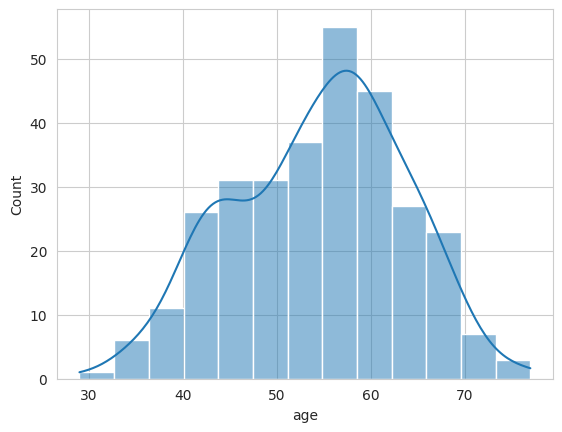

In [ ]:
#data inspection
#histogram about age
sns.histplot(data["age"], kde=True,palette="Set2")


*The majority of the population is between 50 and 60 years of age.*


---



Porcentage of males: 67.987
procentage of females: 32.013


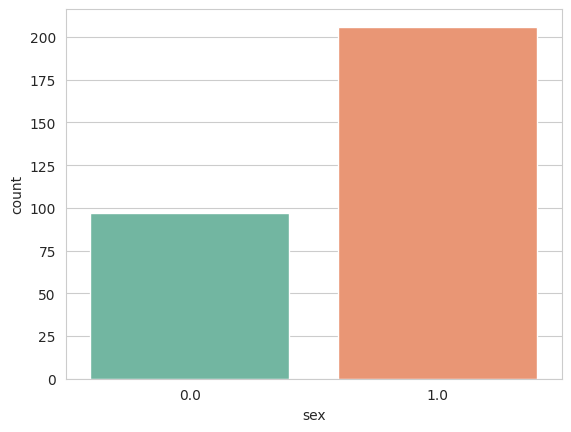

In [ ]:
#work on sex 
sns.set_style('whitegrid')
sns.countplot(x='sex',data=data,palette='Set2')
total = len(data["sex"])
males = data["sex"].sum()
females = len(data["sex"]) - males
print("Porcentage of males:", round(males/total*100, 3))
print("procentage of females:", round(females/total*100, 3))

*The majority of the population are male*




---





Text(0, 0.5, 'amount')

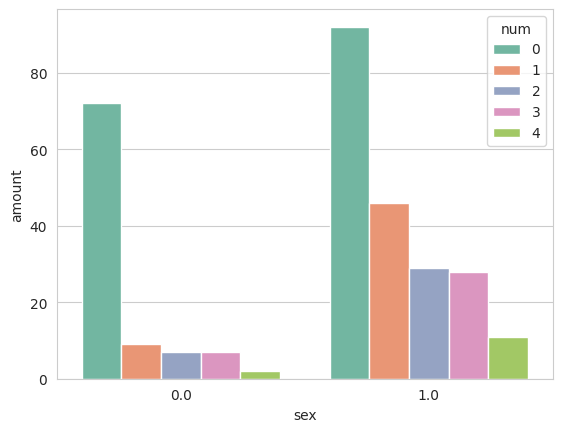

In [ ]:
#healthy about popolution
sex_graph = sns.countplot(x="sex",data=data, hue="num",palette='Set2')
sex_graph.set_ylabel("amount")

*There are no major differences between the number of healthy and unhealthy men. The difference is more notable in the case of women.*


---



Text(0, 0.5, 'amount')

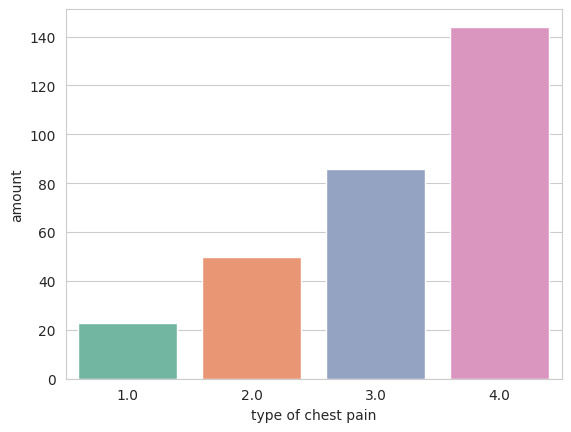

In [ ]:
cp_graph = sns.countplot(data=data, x="cp", palette="Set2")
cp_graph.set_xlabel("type of chest pain")
cp_graph.set_ylabel("amount")

*As observed, the majority of the population is asymptomatic.*

---



<ipython-input-105-6ef3eb9b30ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f')


<Axes: >

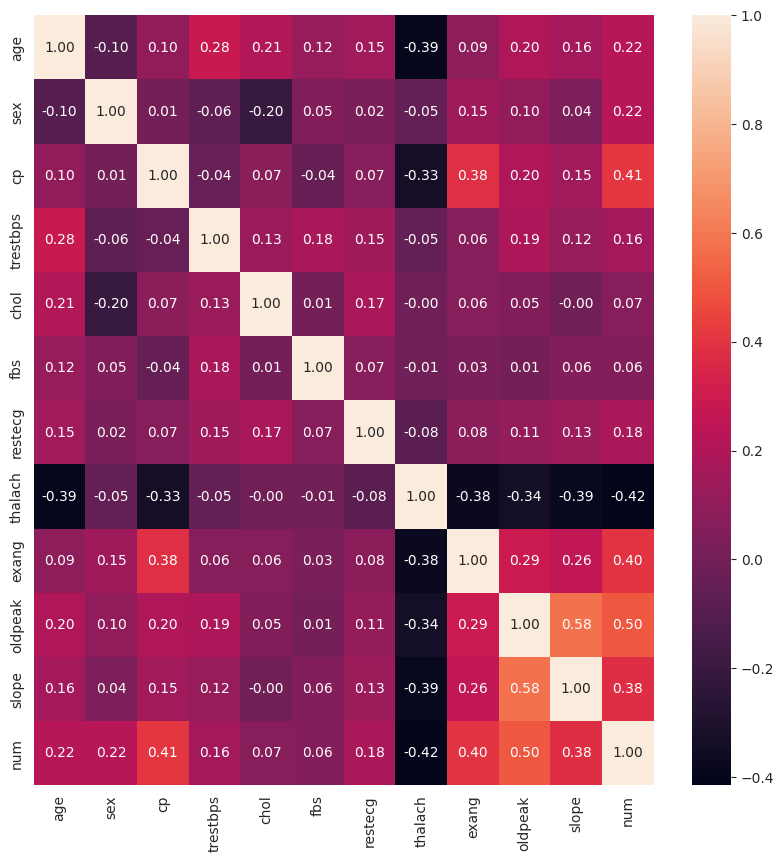

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

*This correlation indicates that the attributes most closely related to the target are cp,exang,oldpeak.*

---



**processing data**

In [ ]:
#data type format
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
#fixing description of the features
data['age'] = data['age'].astype('int')
data['sex'] = data['sex'].astype('object')
data['cp'] = data['cp'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['slope'] = data['slope'].astype('object')
data['thal'] = data['thal'].astype('object')
#data['trestbps'] = data['trestbps'].astype('int')
#data['chol'] = data['chol'].astype('int')
#data['thalach'] = data['thalach'].astype('int')
data.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [ ]:
# coding categorical characteristics.
data = pd.get_dummies(data)
data.head()

<ipython-input-160-c83954663c8d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-160-c83954663c8d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-160-c83954663c8d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-160-c83954663c8d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data)
<ipython-input-160-c83954663c8d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed 

,age,trestbps,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,2,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,67,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,37,130.0,250.0,187.0,3.5,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,41,130.0,204.0,172.0,1.4,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
print("Heart data shape is:", data.shape[0], "x", data.shape[1])

Heart data shape is: 303 x 14


**MACHINE LEARNING**

for this case we will use the newton-CG, The Newton-CG optimization method is an algorithm used to find the minimum or maximum of a function in a multidimensional space. It is an iterative method that uses a combination of the Newton direction and the conjugate gradient direction to find the minimum of a function.

One of the advantages of using the Newton-CG method is that it is very efficient in convergence. That is, it can find the minimum of a function in fewer iterations than other methods such as the downward gradient. In addition, the Newton-CG method is very useful for optimizing functions that are smooth and have a unique local minimum.

In [ ]:
# Getting features and num
y = data['num']
X = data.drop(['num'], axis = 1)

In [ ]:
X["age"] = X["age"].map(lambda x: (x - X["age"].min()) / (X["age"].max() - X["age"].min()))
X["trestbps"] = X["trestbps"].map(lambda x: (x - X["trestbps"].min()) / (X["trestbps"].max() - X["trestbps"].min()))
X["chol"] = X["chol"].map(lambda x: (x - X["chol"].min()) / (X["chol"].max() - X["chol"].min()))
X["thalach"] = X["thalach"].map(lambda x: (x - X["thalach"].min()) / (X["thalach"].max() - X["thalach"].min()))
X["oldpeak"] = X["oldpeak"].map(lambda x: (x - X["oldpeak"].min()) / (X["oldpeak"].max() - X["oldpeak"].min()))

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

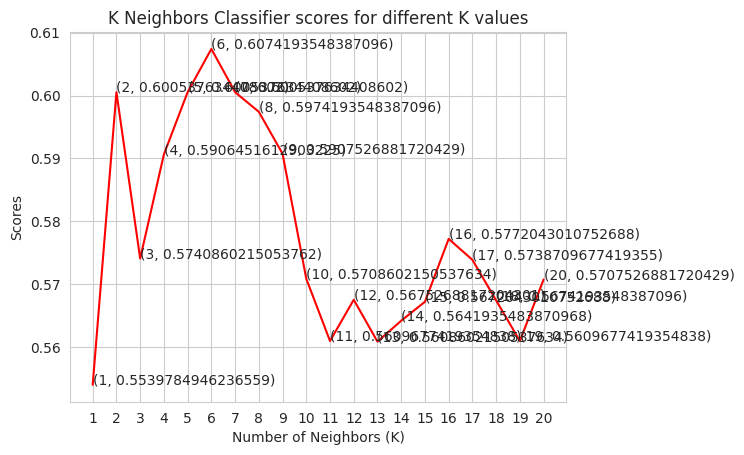

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
#using classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.5675268817204301

In [ ]:
#using ramdomforest model for comprobation 
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.5872043010752688

*The value is close to that obtained with the previous model*

In [ ]:
!jupyter nbconvert --to html modelopredictivoparcial.ipynb

[NbConvertApp] Converting notebook modelopredictivoparcial.ipynb to html
[NbConvertApp] Writing 1057409 bytes to modelopredictivoparcial.html
